# Lesson 8: Feature Selection

---

## Introduction: Why Select Features?

In a machine learning project, feature selection is one of the most crucial steps in the data preprocessing pipeline. It not only helps reduce computational cost but can also improve the model's performance. This lecture will introduce popular feature selection methods and how to apply them in Python using the `scikit-learn` library.

Reducing the number of variables is necessary for the following reasons:

- **Reduce Training Time:** Fewer features mean the model will train faster.
- **Avoid the "Curse of Dimensionality":** As the number of features increases, the data space becomes very large and sparse, making it more difficult to build a good model.
- **Improve Model Performance:** Removing irrelevant or redundant features can help the model focus on important signals, thereby improving accuracy and generalization capabilities.
- **Increase Interpretability:** A model with fewer features is easier to understand and interpret.

## What Methods Are Available?

Feature selection methods are generally divided into three main groups:

1.  **Filter Methods:** Use statistical measures to rank features. Features are selected or removed independently of any machine learning algorithm. These methods are fast and computationally inexpensive.
2.  **Wrapper Methods:** Use a predictive model to evaluate subsets of features. Each new subset is used to train a model, which is then tested on an evaluation dataset. Selecting the "best" subset is treated as a search problem. These methods often yield the best performance but are computationally expensive.
3.  **Embedded Methods:** Machine learning algorithms that perform feature selection as part of the model training process. Typical examples include regularized regression models like Lasso, or decision tree-based models.

In this lesson, we will delve into each method.

# Part I: Filter Methods

---

These methods assess the relationship between each input feature and the target variable using statistical tests. We will categorize these methods based on the data types of the input and target variables.

## 1. Categorical Input & Categorical Output

Common methods in this case are the **Chi-Squared Test** and **Mutual Information**.

### 1.1. Chi-Squared Statistic

#### Definition and Formula
The Chi-squared test is a statistical hypothesis test used to determine if there is a significant association between two categorical variables. In feature selection, we want to test whether an input feature is independent of the target variable.

- **H0 (Null Hypothesis):** The two variables are independent (the feature is not related to the target).
- **H1 (Alternative Hypothesis):** The two variables are dependent (the feature is related to the target).

We calculate the χ² statistic for each feature. A high χ² value suggests that we can reject the null hypothesis, meaning the feature is dependent on the target variable and is therefore useful for the model.

**Formula:**
$$ \chi^2 = \sum \frac{(O - E)^2}{E} $$
Where:
- $O$ is the Observed Frequency.
- $E$ is the Expected Frequency if the two variables were independent.

#### When to Use?
Use when you have a classification problem and the input features are also categorical (e.g., 'gender', 'color', 'age group').
- **Pros:** Simple, fast, easy to interpret.
- **Cons:** Requires the expected frequency in each cell of the contingency table not to be too small (typically > 5).

#### Simple Illustrative Example
Imagine we have data on pet adoption (`'Dog'` or `'Cat'`) based on the adopter's gender (`'Male'` or `'Female'`). We can create a contingency table:

|         | Dog | Cat |
|---------|-----|-----|
| **Male**| 30  | 10  |
| **Female**| 20  | 40  |

The Chi-squared test will calculate whether this distribution is significantly different from what would be expected if gender and pet choice were completely independent. A high χ² value would indicate a relationship, and thus the 'gender' feature is useful for predicting 'pet'.

#### Frequently Asked Questions (FAQ)
- **Why is data encoding necessary?** `chi2` requires non-negative numerical inputs. `OrdinalEncoder` and `LabelEncoder` convert categories into integers to meet this requirement.


### 1.2. Mutual Information Statistic

#### Definition and Formula
Mutual Information (MI) measures the dependency between two variables, quantified as the amount of information (in bits or nats) obtained about one variable through observing the other variable.

**Formula:**
$$ I(X; Y) = \sum_{y \in Y} \sum_{x \in X} p(x, y) \log\left(\frac{p(x, y)}{p(x)p(y)}\right) $$

- An MI value of 0 indicates that the two variables are independent.
- The larger the MI value, the stronger the dependency between the two variables.
Unlike Pearson's correlation, which only measures linear relationships, MI can capture non-linear relationships as well.

#### When to Use?
MI is very flexible and can be used for both categorical and numerical variables.
- **Pros:** Can capture any kind of relationship (linear and non-linear). More powerful than Chi-Squared.
- **Cons:** Requires more data for accurate estimation, and the scores can be harder to interpret directly compared to other methods.

#### Simple Illustrative Example
While Chi-squared only indicates whether two variables are dependent, Mutual Information quantifies the strength of that dependency. If the MI of feature A with the target is 0.5 and that of feature B is 0.1, we can say that feature A contains more information about the target variable than feature B.

#### Frequently Asked Questions (FAQ)
- **How does MI compare to Chi-Squared?** The ranking of features may differ between the two methods. MI can detect relationships that Chi-Squared might miss. It's a good strategy to try both and see which method yields better model performance.

### 1.3. Tools with Scikit-learn

Scikit-learn provides flexible classes for feature selection based on scores. The two most common are:

#### 1.3.1. SelectKBest
`SelectKBest` selects a fixed number `k` of features with the highest scores. You must decide on the value of `k`. This is the most popular choice.

#### 1.3.2. SelectPercentile
`SelectPercentile` selects a percentage of features with the highest scores. For example, if `percentile=10`, it will select the top 10% of features.

#### Lab 1: Applying the Chi-Squared Filter Method

**Breast Cancer Dataset Introduction:** The Breast Cancer dataset from UCI contains characteristics of tumors extracted from images. The goal is to classify a tumor as benign (`'no-recurrence-events'`) or malignant (`'recurrence-events'`). This data is mostly categorical, making it well-suited for practice.

Chi-Squared scores for each feature:
Feature 0: 0.473
Feature 1: 0.029
Feature 2: 2.138
Feature 3: 29.381
Feature 4: 8.223
Feature 5: 8.100
Feature 6: 1.274
Feature 7: 0.951
Feature 8: 3.700


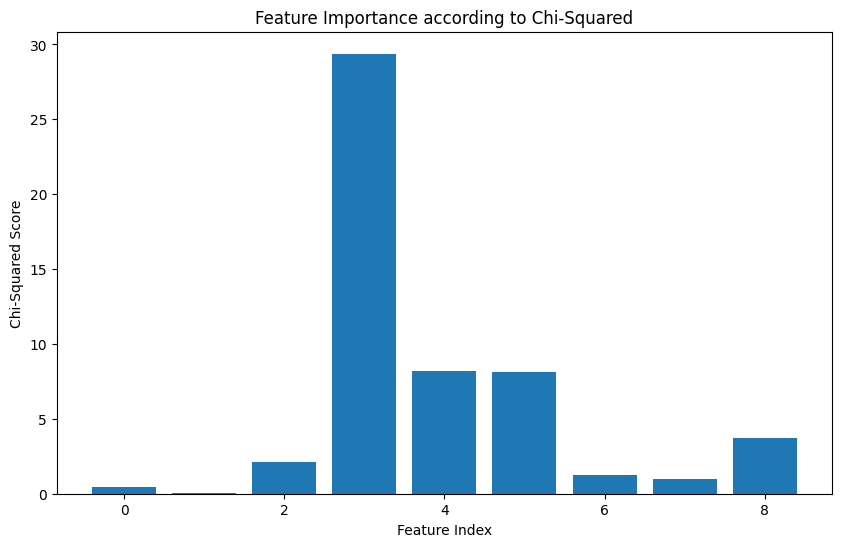

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- 1. Load and Prepare Data ---
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
df = pd.read_csv(url, header=None)
dataset = df.values
X = dataset[:, :-1].astype(str)
y = dataset[:, -1].astype(str)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Encode input features
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

# Encode target variable
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# --- 2. Calculate and Visualize Chi-Squared Scores ---
# Use k='all' to get scores for all features
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)

# Print the scores
print("Chi-Squared scores for each feature:")
for i in range(len(fs.scores_)):
    print(f'Feature {i}: {fs.scores_[i]:.3f}')

# Plot the scores
plt.figure(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Feature Index')
plt.ylabel('Chi-Squared Score')
plt.title('Feature Importance according to Chi-Squared')
plt.show()


In [2]:

# --- 3. Select k=4 best features and evaluate ---
# Based on the plot, we decide to select k=4
selector_kbest = SelectKBest(score_func=chi2, k=4)
selector_kbest.fit(X_train_enc, y_train_enc)

# Get the selected columns
selected_indices = selector_kbest.get_support(indices=True)
print(f"\nIndices of 4 selected features: {list(selected_indices)}")

# Transform the training and test sets
X_train_fs = selector_kbest.transform(X_train_enc)
X_test_fs = selector_kbest.transform(X_test_enc)

# Train a model and evaluate
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
y_pred = model.predict(X_test_fs)
accuracy = accuracy_score(y_test_enc, y_pred)
print(f'Accuracy with SelectKBest(chi2, k=4): {accuracy:.3f}')


Indices of 4 selected features: [np.int64(3), np.int64(4), np.int64(5), np.int64(8)]
Accuracy with SelectKBest(chi2, k=4): 0.747


#### Introduction to Key Parameters
**`SelectKBest`**
- `score_func`: The scoring function to use (e.g., `chi2`, `mutual_info_classif`).
- `k`: The number of features to select. You can set it to `'all'` to view all scores before deciding on a specific value.

## 2. Numerical Input & Categorical Output

Common methods include:
1. **ANOVA F-Statistic:** Measures the difference in mean values of a numerical feature across classes.
2. **Mutual Information Statistic:** Measures the general dependency (both linear and non-linear) between a numerical feature and the classes.
3. **Kendall’s Rank Coefficient:** (Advanced) Useful when the categorical variable is ordinal (e.g., 'low', 'medium', 'high'). It measures rank-based correlation.

### 2.1. ANOVA F-Statistic

#### Definition and Formula
The ANOVA F-test is a statistical test used to determine if there is a significant difference in the mean of a numerical variable across two or more groups. If a feature's mean value varies significantly across classes, it is likely a good predictor.

**Formula:**
$$ F = \frac{\text{variance between groups}}{\text{variance within groups}} $$

The larger the F-value, the more distinct the groups are, and the more important the feature.

#### When to Use?
Use when you have a classification problem and numerical input features (e.g., 'age', 'income', 'temperature').
- **Pros:** Very effective at finding linear relationships (differences in means).
- **Cons:** Assumes that the data is normally distributed and has equal variance among groups (though it's fairly robust in practice).

#### Simple Illustrative Example
Suppose we want to predict if a person has heart disease (`'Yes'`, `'No'`) based on their 'age'. ANOVA would compare:
- The average 'age' of the group with heart disease.
- The average 'age' of the group without heart disease.
If these two averages are significantly different, then 'age' is a good feature.

#### Lab 2: Applying ANOVA F-test

**Pima Indians Diabetes Dataset Introduction:** This dataset records medical metrics for women of the Pima Indian tribe and aims to predict whether a person has diabetes. The input features are numerical, and the target is categorical.

Features selected by ANOVA (k=4): [0, 1, 5, 7]


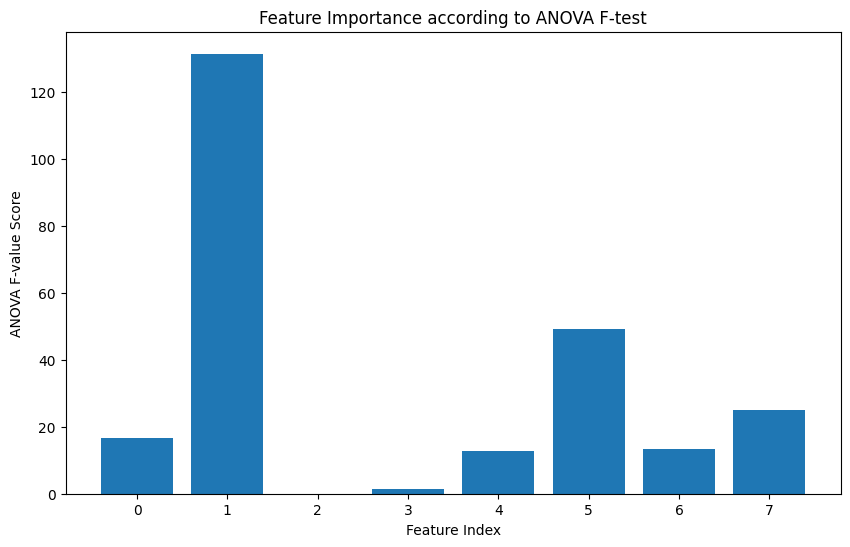

In [3]:
from sklearn.feature_selection import f_classif

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df_diabetes = pd.read_csv(url, header=None)
dataset = df_diabetes.values
X_diabetes = dataset[:, :-1]
y_diabetes = dataset[:, -1]
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, y_diabetes, test_size=0.33, random_state=1)

fs_anova = SelectKBest(score_func=f_classif, k=4)
fs_anova.fit(X_train_d, y_train_d)

# Get the selected features
selected_indices = fs_anova.get_support(indices=True)
selected_features = df_diabetes.columns[selected_indices]
print(f'Features selected by ANOVA (k=4): {list(selected_features)}')

# Plot scores for all features
fs_anova_all = SelectKBest(score_func=f_classif, k='all')
fs_anova_all.fit(X_train_d, y_train_d)
plt.figure(figsize=(10, 6))
plt.bar([i for i in range(len(fs_anova_all.scores_))], fs_anova_all.scores_)
plt.xlabel('Feature Index')
plt.ylabel('ANOVA F-value Score')
plt.title('Feature Importance according to ANOVA F-test')
plt.show()

#### Introduction to Key Parameters
The main tool is still `SelectKBest`.
- `score_func`: Set to `f_classif`. This function calculates the ANOVA F-value for each numerical feature against the categorical target. The `f_classif` function itself has no parameters for the user to tune.
- `k`: The most important parameter to decide how many features to keep.

## 3. Numerical Input & Numerical Output

Common methods include:
1. **Pearson’s Correlation Coefficient:** Measures linear relationships.
2. **Spearman’s Rank Coefficient:** Measures monotonic relationships (including non-linear).
3. **Mutual Information:** Measures general dependency.

### 3.1. Pearson's Correlation Coefficient

#### Definition and Formula
Pearson's correlation coefficient measures the **linear** relationship between two numerical variables. Its value ranges from -1 to +1.

**Formula:**
$$ r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}} $$

#### When to Use?
Use for regression problems with numerical inputs, assuming a linear relationship.
- **Pros:** Fast, easy to understand, provides both magnitude and direction of the relationship.
- **Cons:** Only captures linear relationships.

### 3.2. Spearman's Rank Coefficient

#### Definition
Instead of using the raw values, Spearman's coefficient calculates Pearson's correlation on the **ranks** of the data. This allows it to detect **monotonic** relationships, where as one variable increases, the other consistently increases (or decreases), but not necessarily in a straight line.

#### When to Use?
When you suspect the relationship is not linear but still monotonic, or when the data has outliers, as ranks are less affected by them.

#### Lab 3: Applying Filter Methods for Regression Problems

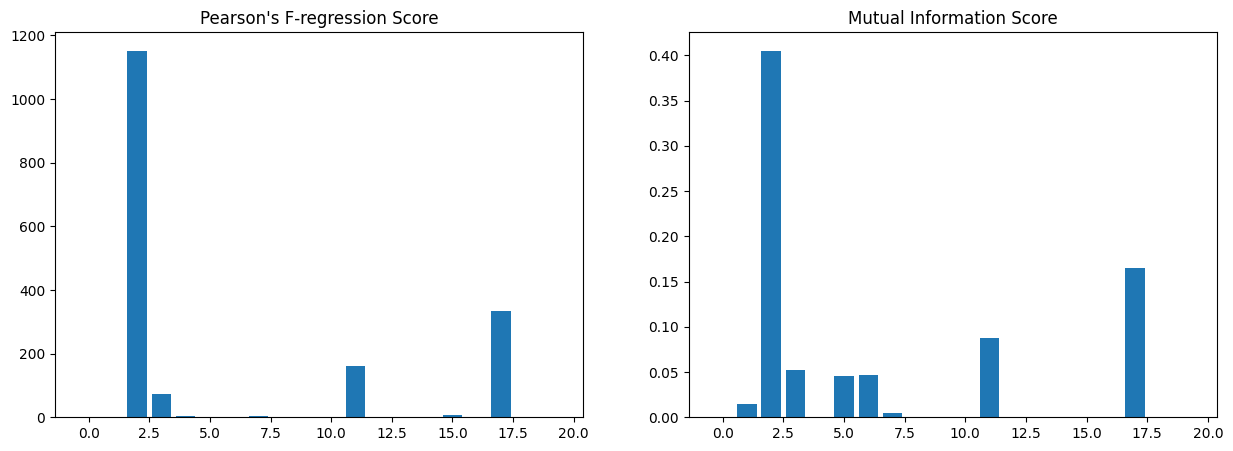

In [4]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import f_regression, mutual_info_regression
import numpy as np

# Create a regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=5, noise=0.1, random_state=1)

# 1. Pearson's Correlation (via f_regression)
fs_pearson = SelectKBest(score_func=f_regression, k='all')
fs_pearson.fit(X_reg, y_reg)

# 2. Mutual Information
fs_mi_reg = SelectKBest(score_func=mutual_info_regression, k='all')
fs_mi_reg.fit(X_reg, y_reg)

# Plot for comparison
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(fs_pearson.scores_)), fs_pearson.scores_)
plt.title("Pearson's F-regression Score")
plt.subplot(1, 2, 2)
plt.bar(range(len(fs_mi_reg.scores_)), fs_mi_reg.scores_)
plt.title('Mutual Information Score')
plt.show()

#### Introduction to Key Parameters
The tool is still `SelectKBest`, but with different scoring functions:
- `score_func`: 
    - `f_regression`: Calculates an F-statistic based on Pearson's correlation. Useful for linear relationships.
    - `mutual_info_regression`: Estimates mutual information for a continuous target variable. Useful for non-linear relationships.

# Part II: Wrapper & Embedded Methods

---

## 1. Wrapper Methods

### 1.1. Concept and Principles
Wrapper methods are techniques that search for subsets of features based on the performance of a specific predictive model.
- **Model Evaluation:** Wrapper methods evaluate multiple models using iterative processes to add and/or remove predictor variables to find the optimal combination that maximizes model performance.
- **Feature Subset:** This technique works by searching for subsets of features that yield the best performance for a given predictive model.
- **Computationally Intensive:** Wrapper methods can be significantly expensive in terms of computation, especially for large datasets and complex models.
- **Variable Type Independent:** Wrapper methods are generally not constrained by the data type of the input variables (e.g., numerical or categorical).

### 1.2. Classification of Search Strategies
Since testing all possible feature subsets is computationally infeasible (for N features, there are $2^N-1$ subsets), wrapper methods use heuristic search strategies to efficiently find a good subset:

- **Stochastic Global Search:** Algorithms like simulated annealing or genetic algorithms can be used to search for optimal feature subsets.
- **Stepwise Methods:** Simpler methods that involve systematically adding or removing features from the model until no further improvement is observed. Examples include:
    - **Forward Selection:** Starts with an empty set and iteratively adds the feature that improves model performance the most.
    - **Backward Elimination:** Starts with all features and iteratively removes the least important feature. **RFE is a prime example of this strategy.**

### 1.3. A Typical Example: Recursive Feature Elimination (RFE)

#### Definition and Principles
RFE is a wrapper-style feature selection method. It works by recursively building a model and, at each step, removing the weakest feature(s) until the desired number of features is reached.

**How RFE Works:**
1. Train a model on the entire set of features (e.g., `LogisticRegression`, `DecisionTreeClassifier`). This model must provide a measure of feature importance (via `coef_` or `feature_importances_` attributes).
2. Find and remove the feature with the lowest importance.
3. Repeat the process with the remaining features until the number of features is reduced to the desired number, `k`.

#### When to Use?
RFE is very useful because it considers not just individual features but also their interactions.
- **Pros:** Often yields better model performance than filter methods because it considers feature interactions.
- **Cons:** Computationally expensive, as it requires training the model multiple times. Risks overfitting if not used carefully with cross-validation.

#### Lab 4: Feature Selection with RFE

In [5]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np

X_clf, y_clf = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = LogisticRegression(solver='lbfgs')
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_clf, y_clf, scoring='accuracy', cv=cv, n_jobs=-1)

print(f'Mean Accuracy with RFE: {np.mean(n_scores):.3f} (±{np.std(n_scores):.3f})')

rfe_standalone = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe_standalone.fit(X_clf, y_clf)

print("\nRFE Selection Results:")
for i in range(X_clf.shape[1]):
    print(f'Column {i}: Selected={rfe_standalone.support_[i]}, Rank={rfe_standalone.ranking_[i]}')

Mean Accuracy with RFE: 0.807 (±0.044)

RFE Selection Results:
Column 0: Selected=False, Rank=3
Column 1: Selected=False, Rank=5
Column 2: Selected=True, Rank=1
Column 3: Selected=True, Rank=1
Column 4: Selected=True, Rank=1
Column 5: Selected=False, Rank=6
Column 6: Selected=True, Rank=1
Column 7: Selected=False, Rank=2
Column 8: Selected=True, Rank=1
Column 9: Selected=False, Rank=4


#### Introduction to Key Parameters (`RFE`)
- `estimator`: The machine learning model used to evaluate feature importance. This model must have a `coef_` or `feature_importances_` attribute.
- `n_features_to_select`: (int or float, default=None) The final number of features to keep. If `None`, half of the features will be selected.
- `step`: (int or float, default=1) The number of features to remove at each iteration. If `step=1`, the weakest feature is removed each time. If `step=0.1`, 10% of features are removed each time.

#### Frequently Asked Questions (FAQ)
- **How to find the optimal number of features?** `sklearn` provides the `RFECV` class, an enhanced version of `RFE` that automatically finds the optimal number of features through cross-validation.

## 2. Embedded Methods / Feature Importance

Many machine learning models, during their training process, inherently calculate and assign a score to each input feature that reflects its usefulness. This is an embedded method because feature selection is performed within the model itself.

### 2.1. Coefficients as Feature Importance

#### Definition
Linear models (e.g., `LogisticRegression`, `LinearRegression`) assign a coefficient to each feature. The absolute value of this coefficient can be used as a measure of importance. The larger the coefficient, the greater the feature's influence on the prediction.

#### When to Use?
When using linear models. It's very fast and efficient, but requires features to be scaled to fairly compare coefficients. This method only captures linear relationships.

#### Simple Illustrative Example
Suppose a linear regression model learns the formula `House_Price = 150 * Area - 5000 * Distance_to_Center`. The coefficient `150` for `Area` indicates that each additional square meter increases the price (positive influence), while the coefficient `-5000` for `Distance_to_Center` indicates that each additional kilometer from the center decreases the price (negative influence). In terms of magnitude, `Distance_to_Center` appears more important (if the data is scaled).

#### Lab 5a: Using Coefficients of Logistic Regression

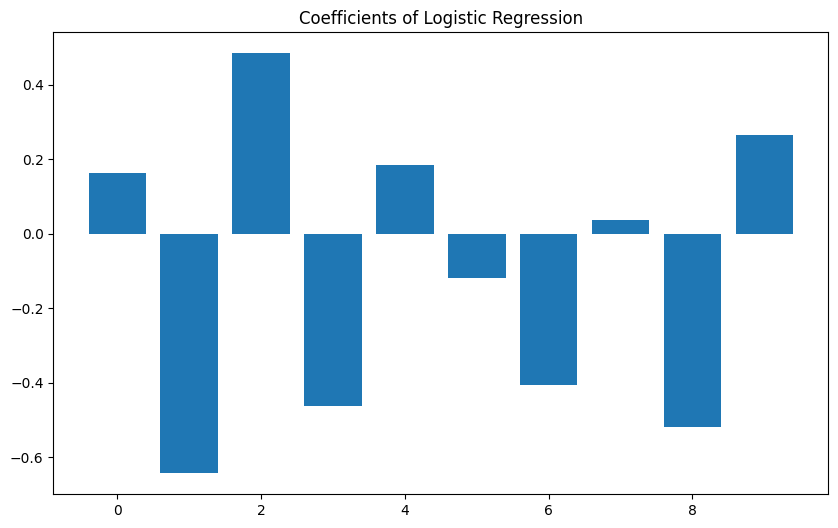

In [6]:
X_clf, y_clf = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_clf, y_clf)
importance_lr = model_lr.coef_[0]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_lr)), importance_lr)
plt.title('Coefficients of Logistic Regression')
plt.show()

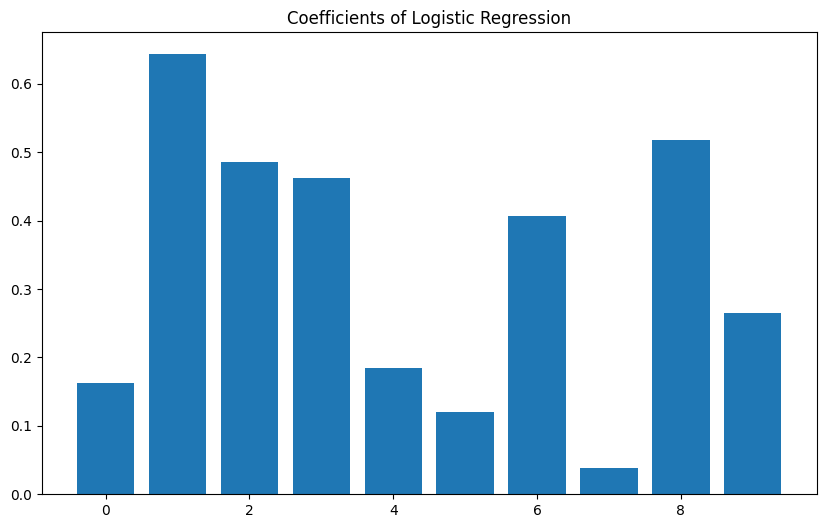

In [9]:
importance_lr = np.absolute(model_lr.coef_[0])

plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_lr)), importance_lr)
plt.title('Coefficients of Logistic Regression')
plt.show()

#### Introduction to Key Parameters (`LogisticRegression`)
Parameters that affect the model's coefficients include:
- `penalty`: (`'l1'`, `'l2'`, `'elasticnet'`, `'none'`, default=`'l2'`) The type of regularization used. `'l1'` (Lasso) can push the coefficients of unimportant features to zero, thus performing feature selection itself.
- `C`: (float, default=`1.0`) Inverse of regularization strength. Smaller values of `C` correspond to stronger regularization, which can shrink the coefficients.

### 2.2. Decision Tree Feature Importance

#### Definition
Models like `DecisionTree`, `RandomForest`, and `GradientBoosting` calculate importance based on how much a feature improves the purity of the nodes in a tree (e.g., by reducing Gini impurity or entropy) whenever it is chosen for a split. A feature's importance is the total reduction in impurity it provides across all trees in an ensemble (like RandomForest), normalized to sum to 1.

#### When to Use?
When using tree-based models. It's very powerful as it can capture non-linear interactions. However, it can be biased towards high cardinality categorical features and numerical features.

#### Simple Illustrative Example
Imagine a decision tree trying to classify emails as 'spam' or 'not spam'. If splitting the data based on the feature `contains_promo_keyword` results in the largest reduction in class confusion (the biggest drop in Gini impurity), this feature will receive a high importance score.

#### Lab 5b: Using Feature Importance from Random Forest

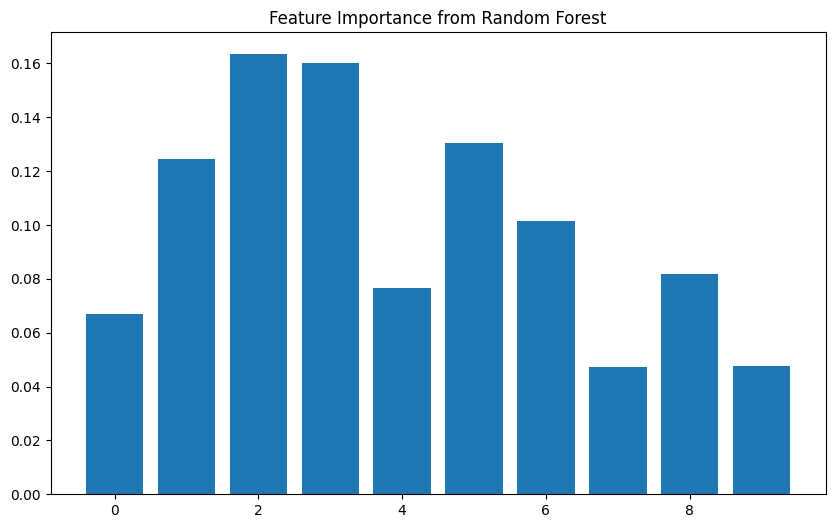

In [10]:
from sklearn.ensemble import RandomForestClassifier

X_clf, y_clf = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_clf, y_clf)
importance_rf = model_rf.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_rf)), importance_rf)
plt.title('Feature Importance from Random Forest')
plt.show()

#### Introduction to Key Parameters (`RandomForestClassifier`)
Model parameters can affect the feature importance results:
- `n_estimators`: (int, default=100) The number of trees in the forest. A larger number of trees generally leads to more stable importance results.
- `max_depth`: (int, default=None) The maximum depth of the tree. If unlimited, trees can become overly complex, and the importance scores might overfit to the training data.

### 2.3. Permutation Feature Importance

#### Definition
This is a model-agnostic method. It works by randomly shuffling the values of a single feature and measuring the decrease in the model's performance. The feature that causes the largest performance drop when shuffled is considered the most important.

#### When to Use?
Can be applied to any fitted model. It is considered one of the most reliable methods as it directly measures a feature's importance to the model's performance on a specific dataset (usually a validation or test set). The main drawback is its computational cost.

#### Simple Illustrative Example
1. Train a model and evaluate it on a validation set, achieving 90% accuracy.
2. Take the 'age' feature column in the validation set and shuffle its values, keeping other columns intact.
3. Use the trained model to predict again on this modified validation set. Suppose the accuracy drops to 70%.
4. The importance of 'age' is calculated as the performance drop: 90% - 70% = 20%.

#### Lab 5c: Using Permutation Importance

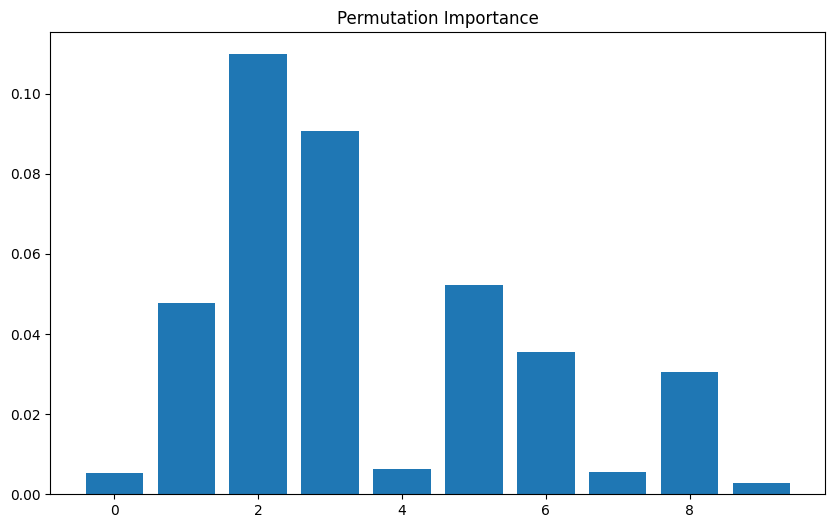

In [11]:
from sklearn.inspection import permutation_importance

X_clf, y_clf = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_clf, y_clf)

results_perm = permutation_importance(model_rf, 
                                      X_clf, y_clf, 
                                      scoring='accuracy', 
                                      n_repeats=10, 
                                      random_state=1, 
                                      n_jobs=-1)
importance_perm = results_perm.importances_mean

plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_perm)), importance_perm)
plt.title('Permutation Importance')
plt.show()

#### Introduction to Key Parameters (`permutation_importance`)
- `estimator`: The fitted model.
- `X`, `y`: The data used to calculate permutation importance. **It is highly recommended to use a validation or test set** to get the most objective assessment of feature importance.
- `scoring`: The performance metric to use (e.g., `'accuracy'`, `'r2'`, `'neg_mean_squared_error'`).
- `n_repeats`: (int, default=5) The number of times to repeat the permutation for each feature to get more stable results.
- `random_state`: To ensure reproducible results.

# Part III: Summary

---

Feature selection is an essential step for building effective machine learning models. Here is a summary table to help you choose the appropriate method:

| Method Type | Method Name | Input Type | Output Type | Pros | Cons |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Filter** | **Chi-Squared** | Categorical | Categorical | Fast, simple | Only indicates independence, not strength |
| | **ANOVA F-test** | Numerical | Categorical | Fast, effective for linear relationships | Relies on data distribution assumptions |
| | **Pearson's Corr.** | Numerical | Numerical | Fast, gives direction and strength | Only captures linear relationships |
| | **Mutual Info.** | Any | Any | Powerful, captures non-linear relationships | Needs more data, computationally slower |
| **Wrapper** | **RFE** | Any | Any | High performance, considers feature interactions | Very computationally expensive, risk of overfitting |
| **Embedded** | **Feature Importance** | Any | Any | Integrated into the model, efficient | Depends on the chosen model |

**General Advice:**
1. Start with **Filter** methods to get a quick overview and eliminate obviously irrelevant features.
2. Use **Embedded** methods (like Feature Importance from RandomForest) to get a more reliable feature ranking.
3. If performance is the top priority and you have sufficient computational resources, use **Wrapper** methods like `RFECV` to fine-tune the final feature set.